In [66]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
os.chdir('E:/Data-Science/Python')

In [51]:
df = pd.read_csv('Admission_Predict.csv', index_col = ['Serial No.'])

In [52]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
df['Chance of Admit '] = np.where(df['Chance of Admit ']>=0.5, 1, 0)

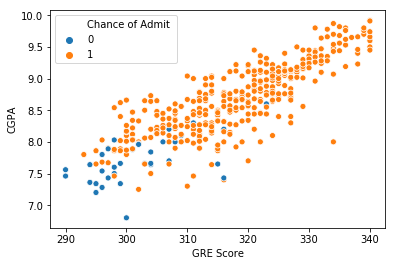

In [72]:
sns.scatterplot(y = 'CGPA', x = 'GRE Score', data = df, hue = 'Chance of Admit ')
plt.show()

In [95]:
X = np.array(df.iloc[:,0:7])
X = np.append(np.ones((df.shape[0],1)), X, axis = 1)
y = np.array(df.iloc[:,7]).reshape(df.shape[0],1)

In [73]:
df.shape

(400, 8)

In [193]:
X.shape

(400, 8)

In [192]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [191]:
def compute_costfunc(X, y, theta, lmbda = 0.01):
    m = len(y)
    h = sigmoid(np.dot(X, theta)) #hypothesis, predicted value
    return -(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))/m + lmbda*np.sum(theta**2) /(2*m) 

In [194]:
def gradientdescent(x, y, theta, alpha, iterations, lmbda = 0.01):
    m = len(y)
    c = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        descent = np.dot(X.T,h - y)
        theta_0 = (theta - ((alpha/m) * descent))[0]
        theta_j = (theta*(1 - (alpha*lmbda)/m) - ((alpha/m) * descent))[1:]
        theta = np.append(theta_0.reshape(1,1),theta_j,axis = 0)
        c.append(compute_costfunc(X, y, theta))
    return c, theta

In [195]:
theta = np.zeros((df.shape[1],1))

In [196]:
theta.shape

(8, 1)

In [197]:
print(compute_costfunc(X, y, theta))

0.6931471805599452


In [207]:
C, theta_new = gradientdescent(X, y, theta, 0.001, 50)

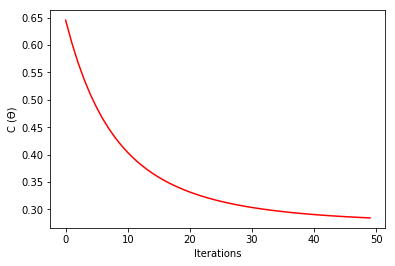

In [208]:
plt.plot(C, color = 'red')
plt.xlabel('Iterations')
plt.ylabel('C (\u03F4)')
plt.show()